<a href="https://colab.research.google.com/github/GunH-colab/basicsML/blob/master/Classification/housepricingdatacsv_keras(Sequential)_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   **Sequential API**
*   **Housingprices Dataset**
*   **Standarized using MinMaxScaler**
*   **Regularized(L2 and Early Stopping)** 
*   **Heatmaps and distplots of dataset included**

In [1]:
#importing all the necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# you need to upload the housepricedata.csv on Colab first. df is the DataFrame.
# The corresponding csv file can be found in the folder of this ipynb


# you can also down it from -> https://drive.google.com/file/d/1GfvKA0qznNVknghV4botnNxyH-KvODOC/view

df = pd.read_csv('housepricedata.csv')

In [3]:
df.info() # dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [5]:
# take your input for n for the number of rows you want to view

n = int(input())

df.head(n) # viewing the first n rows

10


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [6]:
df.isnull().sum() # viewing the sum of missing values of each features in the datasets

LotArea             0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
AboveMedianPrice    0
dtype: int64

In [7]:
# bingo !!! there is no misssing values

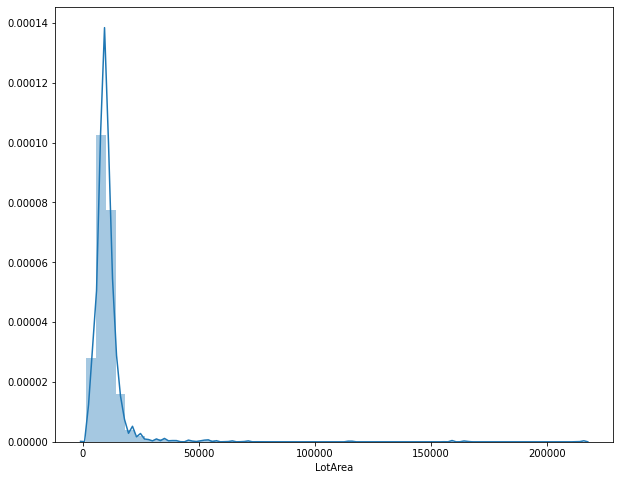

In [8]:
LABEL = "LotArea" # you can try using any other label too, such as longitude/latitude

plt.figure(figsize=(10, 8))
sns.distplot(df[LABEL])

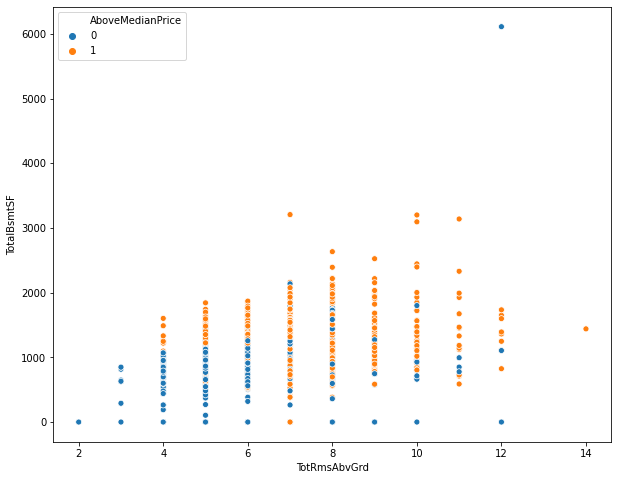

In [9]:
X, Y = "TotRmsAbvGrd", "TotalBsmtSF" # you can try labels of your choice too for X and Y

plt.figure(figsize=(10, 8))
sns.scatterplot(X, Y, markers='.', hue='AboveMedianPrice', data=df)


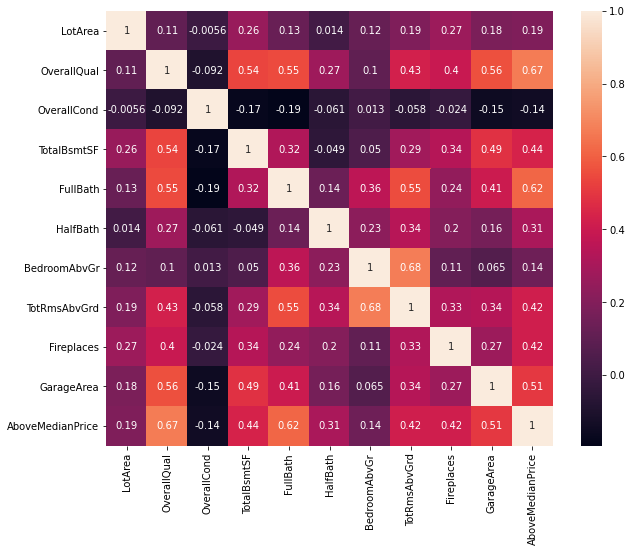

In [10]:
# for establishing pairwise correlation between any two labels( **df.corr() does it**)

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

In [11]:
df.describe() # viewing the 'stats' of the dataset

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


In [12]:
data = df.drop('AboveMedianPrice', axis=1) # slicing off thhe feature 'AboveMedianPrice'
target = df['AboveMedianPrice'] # using the same feature as labels. 1 for 'yes', 0 for 'no'

In [13]:
data.values # viewing the values

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]])

In [14]:
print(target)

0       1
1       1
2       1
3       0
4       1
       ..
1455    1
1456    1
1457    1
1458    0
1459    0
Name: AboveMedianPrice, Length: 1460, dtype: int64


In [15]:
# standarizing using MinMax

mms = MinMaxScaler()
data_mms = mms.fit_transform(data)

In [16]:
data_mms # normalized values

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [17]:
# splitting into train and test/val sets
train_data, test_data_full, train_targets, test_targets_full = train_test_split(data_mms, target, test_size=0.3, random_state=42)

# further splitting into validation and train sets

val_data, test_data, val_targets, test_targets = train_test_split(test_data_full, test_targets_full, test_size=0.5)

# checking the shapes
print(train_data.shape, val_data.shape, test_data.shape, train_targets.shape, val_targets.shape, test_targets.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [18]:
# The model

model = keras.models.Sequential([
        keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(10,)),
        keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.001))
])

In [19]:
# compiling

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
# setting early stopping regularization

ES = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training
history = model.fit(x=train_data,y=train_targets.values,
          validation_data=(val_data, val_targets),
          batch_size=128,epochs=400, callbacks=[ES])

Epoch 1/400
8/8 [==============================] - 0s 26ms/step - loss: 0.7362 - accuracy: 0.5930 - val_loss: 0.7332 - val_accuracy: 0.5890
Epoch 2/400
8/8 [==============================] - 0s 7ms/step - loss: 0.7344 - accuracy: 0.5890 - val_loss: 0.7316 - val_accuracy: 0.6210
Epoch 3/400
8/8 [==============================] - 0s 5ms/step - loss: 0.7327 - accuracy: 0.5890 - val_loss: 0.7300 - val_accuracy: 0.6073
Epoch 4/400
8/8 [==============================] - 0s 6ms/step - loss: 0.7311 - accuracy: 0.5861 - val_loss: 0.7284 - val_accuracy: 0.5936
Epoch 5/400
8/8 [==============================] - 0s 6ms/step - loss: 0.7295 - accuracy: 0.5783 - val_loss: 0.7269 - val_accuracy: 0.5799
Epoch 6/400
8/8 [==============================] - 0s 6ms/step - loss: 0.7281 - accuracy: 0.5724 - val_loss: 0.7255 - val_accuracy: 0.5753
Epoch 7/400
8/8 [==============================] - 0s 5ms/step - loss: 0.7267 - accuracy: 0.5665 - val_loss: 0.7242 - val_accuracy: 0.5662
Epoch 8/400
8/8 [=========

In [21]:
# evaluation

model.evaluate(test_data, test_targets)

7/7 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.9315


[0.29191213846206665, 0.931506872177124]

In [22]:
# recording the predictions

preds = model.predict(test_data)

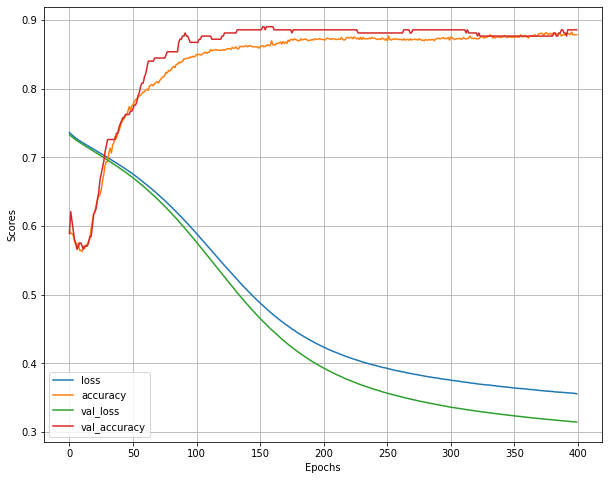

In [23]:
# performance graphs(as a whole)

pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.grid(True)

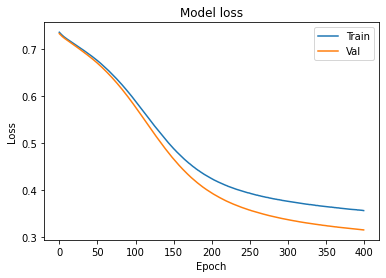

In [24]:
# loss graph

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

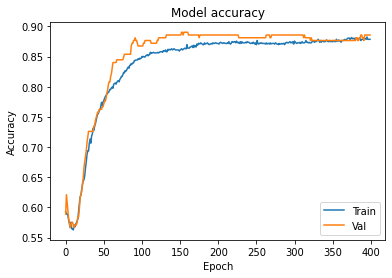

In [25]:
# accuracy graph

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [26]:
# first 10 labels

print(test_targets[:10])

605     1
1057    1
381     1
589     0
292     0
584     0
1430    1
1249    0
377     1
1125    0
Name: AboveMedianPrice, dtype: int64


In [27]:
# first 10 predictions
# NOW YOU SEE. We got some scores. We'd just round these off to the 
# nearest integers which is 0 or 1. As you can see in the output the scores predicted are between 0 to 1  

print(preds[:10])

[[0.9867948 ]
 [0.9370372 ]
 [0.89790213]
 [0.0352996 ]
 [0.31425026]
 [0.01818854]
 [0.7501423 ]
 [0.02351594]
 [0.98847914]
 [0.1798945 ]]


In [28]:
# rounding off

preds_new = np.around(preds)

In [29]:
# our actual desired redicted labels

print(preds_new[:10])

[[1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]]


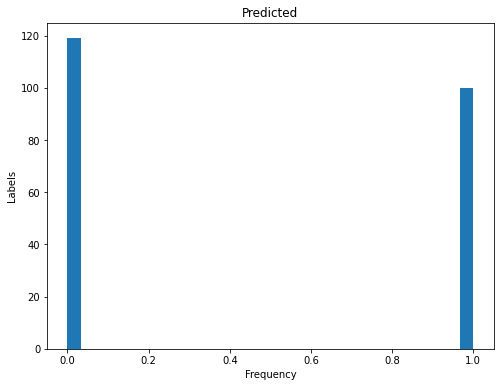

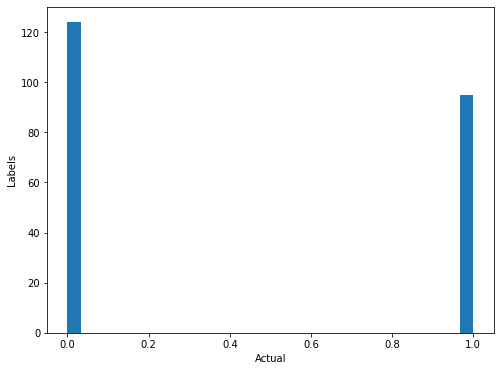

In [30]:
# now we would compare our predicted values with the actual values using histograms

plt.figure(figsize=(8, 6))
plt.hist(preds_new, density=False, bins=30)
plt.ylabel('Labels')
plt.xlabel('Frequency')
plt.title('Predicted')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(test_targets, density=False, bins=30)
plt.ylabel('Labels')
plt.xlabel('Frequency')
plt.ylabel('Labels')
plt.xlabel('Actual')
plt.show()

In [31]:
# predicted counts

elements, counts_preds = np.unique(preds_new, return_counts=True)
print(elements, "->", counts_preds)

[0. 1.] -> [119 100]


In [32]:
# actual counts

elements, counts_preds = np.unique(test_targets, return_counts=True)
print(elements, "->", counts_preds)

[0 1] -> [124  95]
